In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import json

details = pd.read_json("../../data/raw/IMDB_movie_details.json", lines=True)
reviews = pd.read_json("../../data/raw/IMDB_reviews.json", lines=True)
data = pd.merge(details, reviews, on='movie_id')
print(data.head())
print(data.info())

    movie_id                                       plot_summary  duration  \
0  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   
1  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   
2  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   
3  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   
4  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   

                genre  rating_x release_date  \
0  [Action, Thriller]       6.9   1992-06-05   
1  [Action, Thriller]       6.9   1992-06-05   
2  [Action, Thriller]       6.9   1992-06-05   
3  [Action, Thriller]       6.9   1992-06-05   
4  [Action, Thriller]       6.9   1992-06-05   

                                       plot_synopsis        review_date  \
0  Jack Ryan (Ford) is on a "working vacation" in...       5 March 2008   
1  Jack Ryan (Ford) is on a "working vacation" in...    15 October 2007   
2  Jack Ryan (Ford) is 

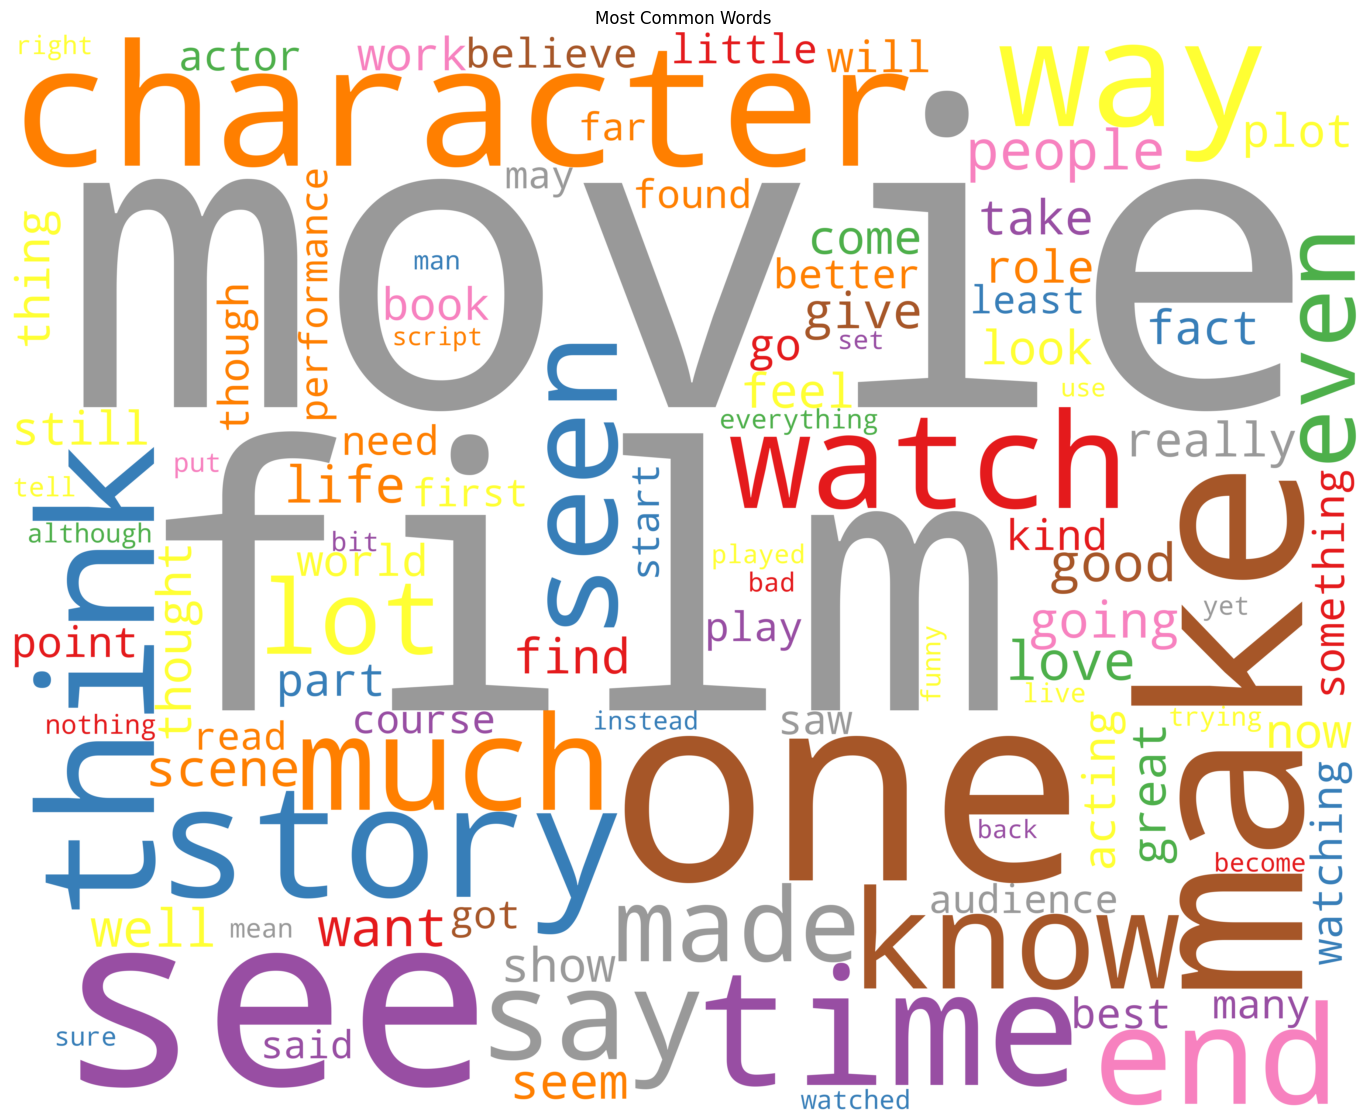

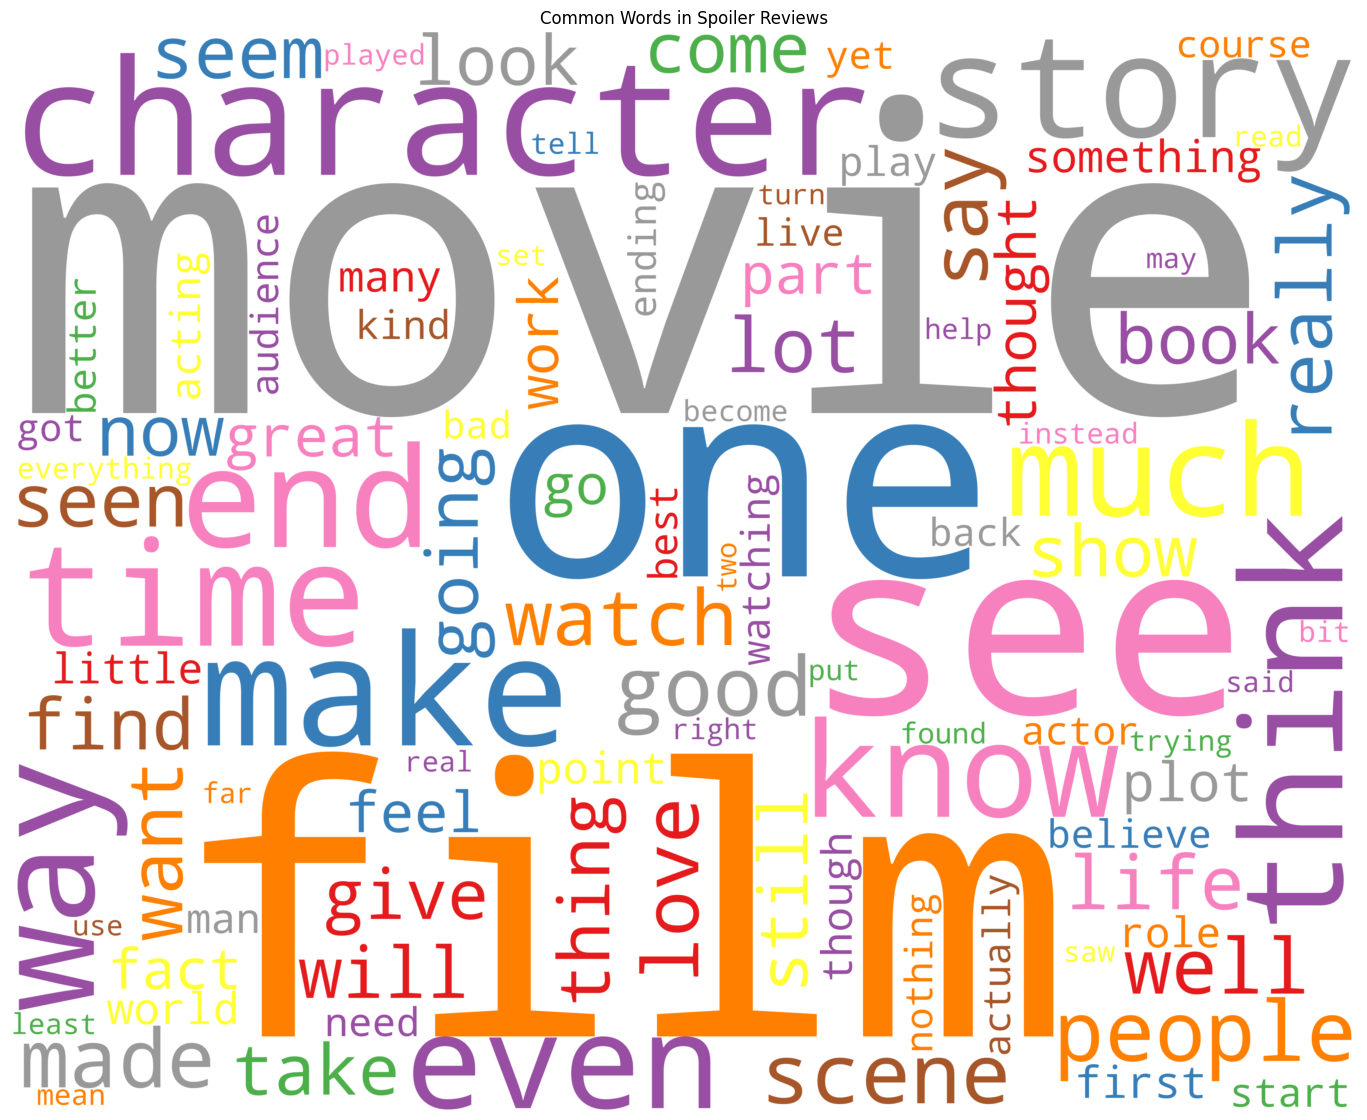

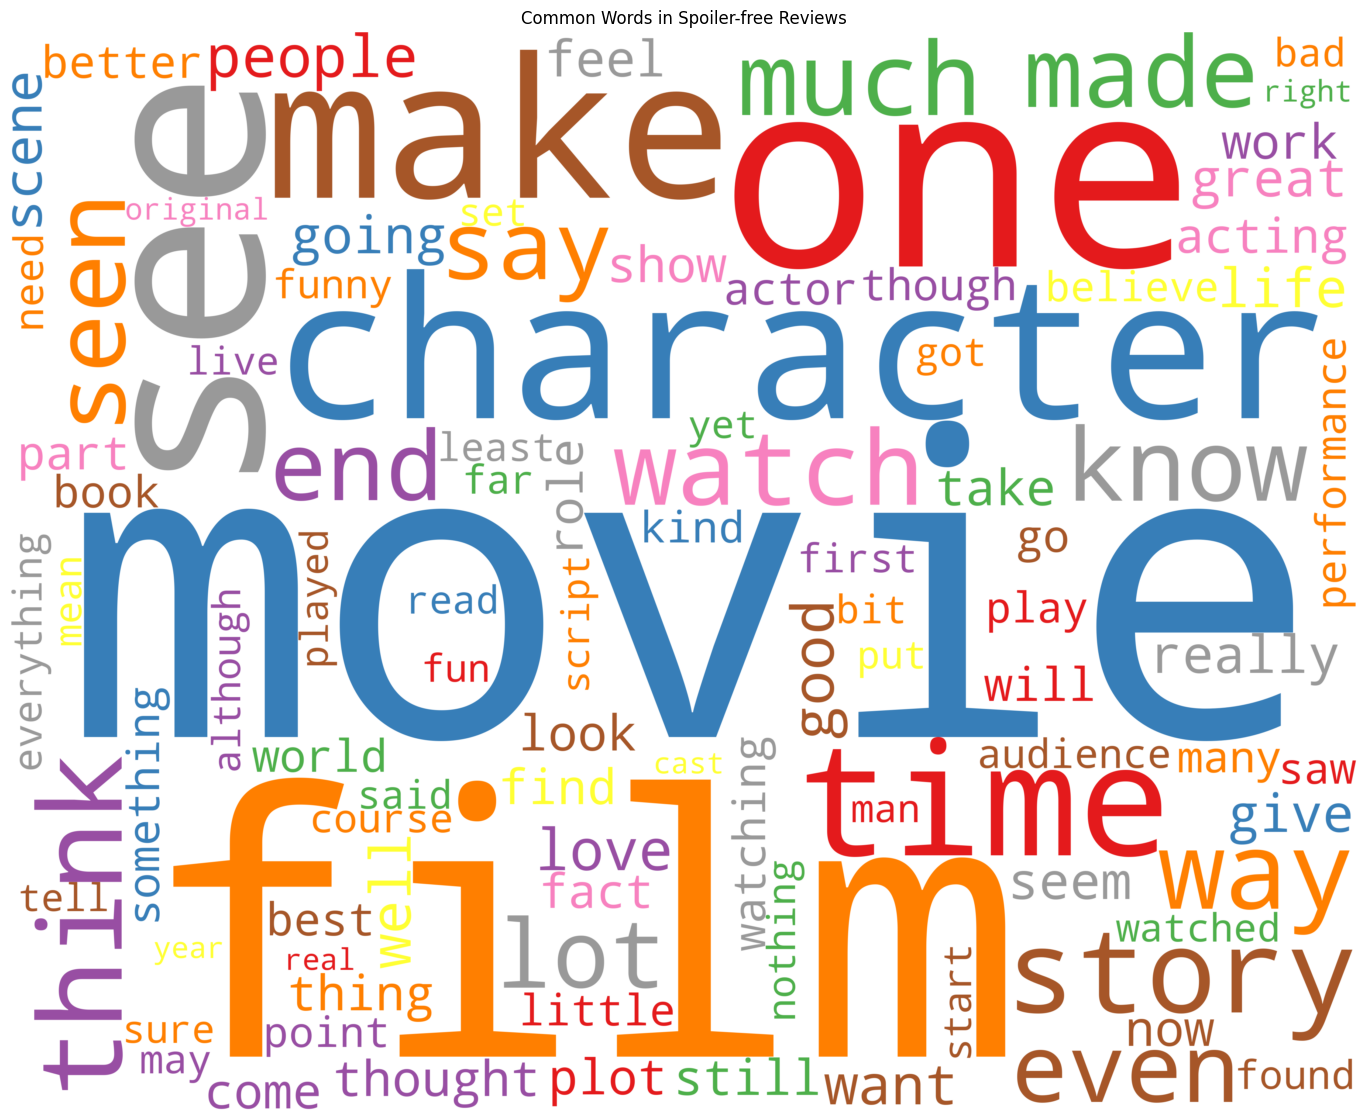

In [ ]:
#Word cloud pre cleaning
def create_wc(text, title):
    word_cloud = WordCloud(width=5000, height=4000,background_color='white', colormap='Set1',max_words=100).generate(text)
    plt.figure(figsize=(20,14))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

all_reviews = ' '.join(data['review_text'].astype(str))
create_wc(all_reviews, 'Most Common Words')
spoiler_data = data[data['is_spoiler'] == True]
non_spoiler_data = data[data['is_spoiler'] == False]
spoiler_reviews = ' '.join(spoiler_data['review_text'].astype(str))
non_spoiler_reviews = ' '.join(non_spoiler_data['review_text'].astype(str))
create_wc(spoiler_reviews, 'Common Words in Spoiler Reviews')
create_wc(non_spoiler_reviews, 'Common Words in Spoiler-free Reviews')

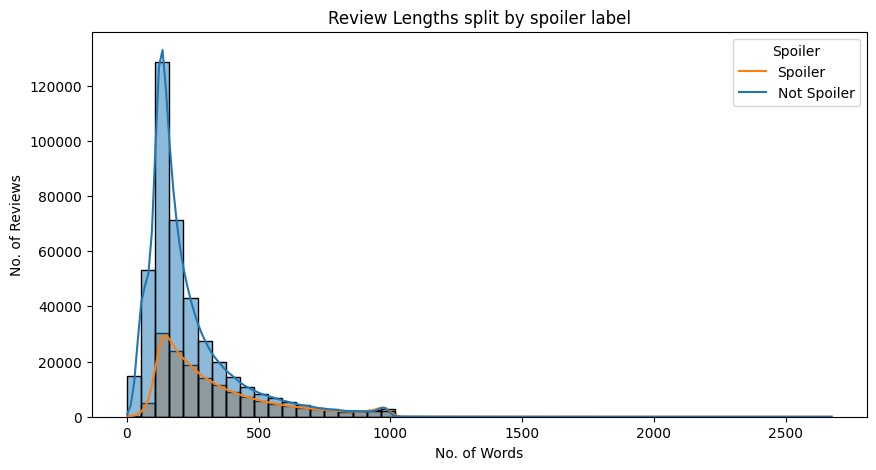

In [26]:
#Histogram of spoiler and non spoiler by word count (pre cleaning)
data['word_count'] = data['review_text'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='word_count',bins=50, kde=True, hue='is_spoiler')
plt.title('Review Lengths split by spoiler label')
plt.xlabel('No. of Words')
plt.ylabel('No. of Reviews')
plt.legend(title = 'Spoiler', labels= ['Spoiler','Not Spoiler'])
plt.show()

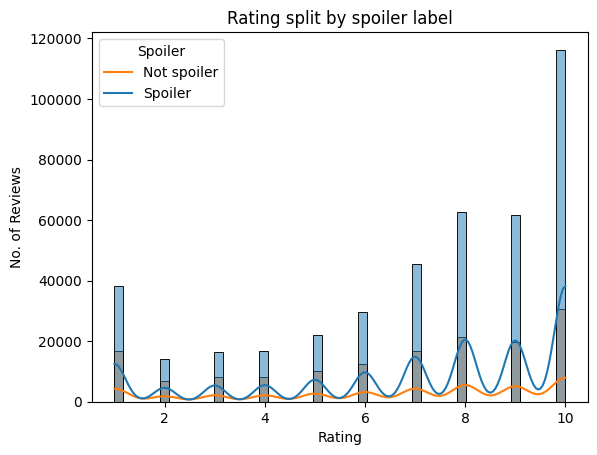

In [ ]:
#Histogram of spoiler and non spoiler by rating (Not a good representation)
sns.histplot(data= data,x='rating_y', hue='is_spoiler', bins=50, kde=True)
plt.title('Rating split by spoiler label')
plt.xlabel('Rating')
plt.ylabel('No. of Reviews')
plt.legend(title ='Spoiler', labels=['Not spoiler','Spoiler'])
plt.show()

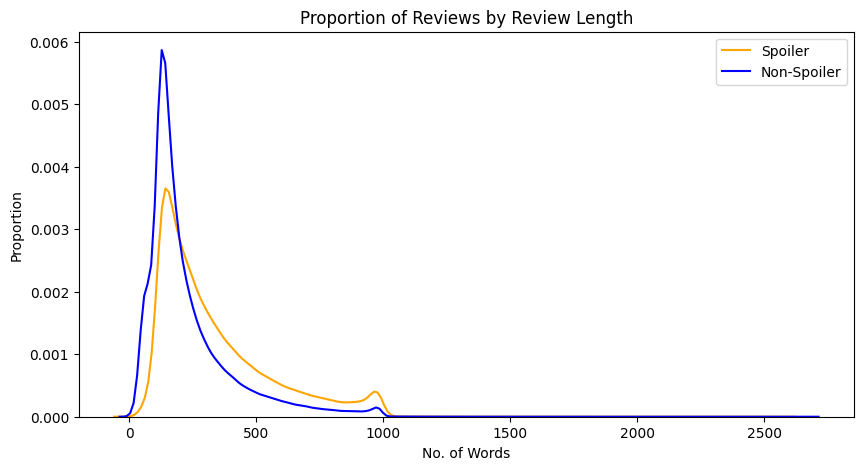

In [27]:
#Density plot of spoiler and non-spoiler by word count (pre-cleaning)
spoiler_data = data[data['is_spoiler']==True]
non_spoiler_data = data[data['is_spoiler']==False]
spoiler_word_count= spoiler_data['word_count']
non_spoiler_word_count= non_spoiler_data['word_count']
plt.figure(figsize=(10,5))
sns.kdeplot(spoiler_word_count, label='Spoiler', color='orange')
sns.kdeplot(non_spoiler_word_count, label='Non-Spoiler', color='blue')
plt.xlabel('No. of Words')
plt.ylabel('Proportion')
plt.title('Proportion of Reviews by Review Length')
plt.legend()
plt.show()

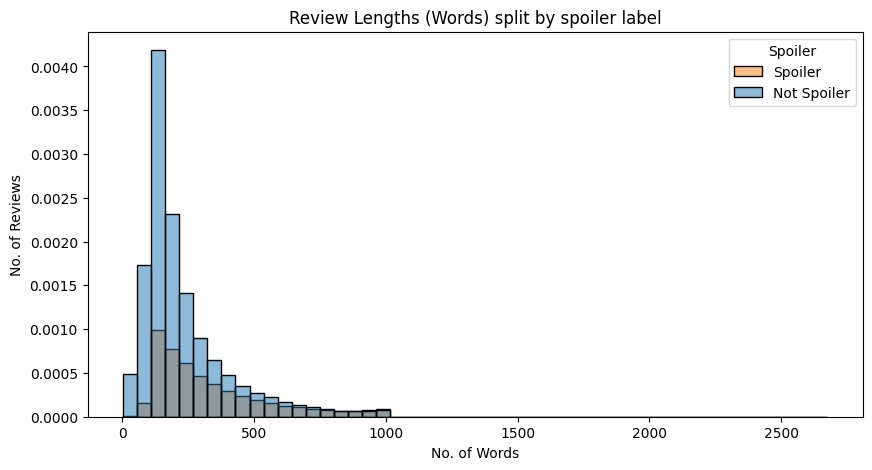

In [30]:
#Histogram of proportions of spoiler labels by word count (pre-cleaning)
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='word_count',bins=50, hue='is_spoiler', stat='density')
plt.title('Review Lengths (Words) split by spoiler label')
plt.xlabel('No. of Words')
plt.ylabel('No. of Reviews')
plt.legend(title = 'Spoiler', labels= ['Spoiler','Not Spoiler'])
plt.show()

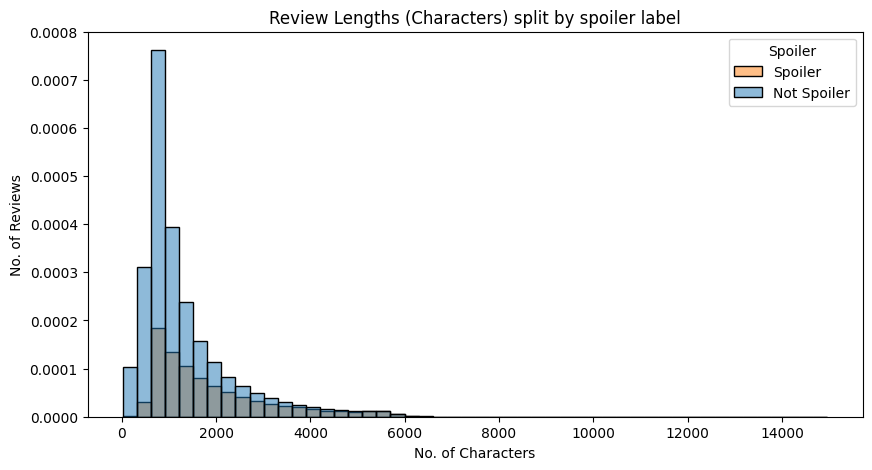

In [31]:
#Histogram of proportions of spoiler labels by character count (pre-cleaning)
data['char_count'] = data['review_text'].astype(str).apply(lambda x: len(x))
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='char_count',bins=50, hue='is_spoiler', stat='density')
plt.title('Review Lengths (Characters) split by spoiler label')
plt.xlabel('No. of Characters')
plt.ylabel('No. of Reviews')
plt.legend(title = 'Spoiler', labels= ['Spoiler','Not Spoiler'])
plt.show()

In [32]:
#Post data cleaning + split
data_c = pd.read_json("../../data/processed/IMDB_reviews_train_cleaned.json")
print(data_c.head())
print(data_c.info())

             review_date   movie_id     user_id  is_spoiler  \
550430  14 February 2011  tt0118929  ur24899688       False   
154559      3 March 2012  tt1601913  ur32097893        True   
368294   1 November 2004  tt0372588   ur4181498       False   
184894    14 August 2013  tt1650554  ur38428305       False   
515314     28 March 2007  tt0112384   ur2626332       False   

                                              review_text  rating  \
550430  a very engaging retro futuristic with a very o...       7   
154559  lagged everything no actor no real context to ...       4   
368294  hysterical smart course not for kid south park...      10   
184894  brilliant i did not stop laughing wincing the ...       9   
515314  ron howard without doubt excellent the best fa...       8   

                                      review_summary  
550430                  Retro-futuristic moody movie  
154559           Could of been a much better film...  
368294  Team America - Just go and watch 

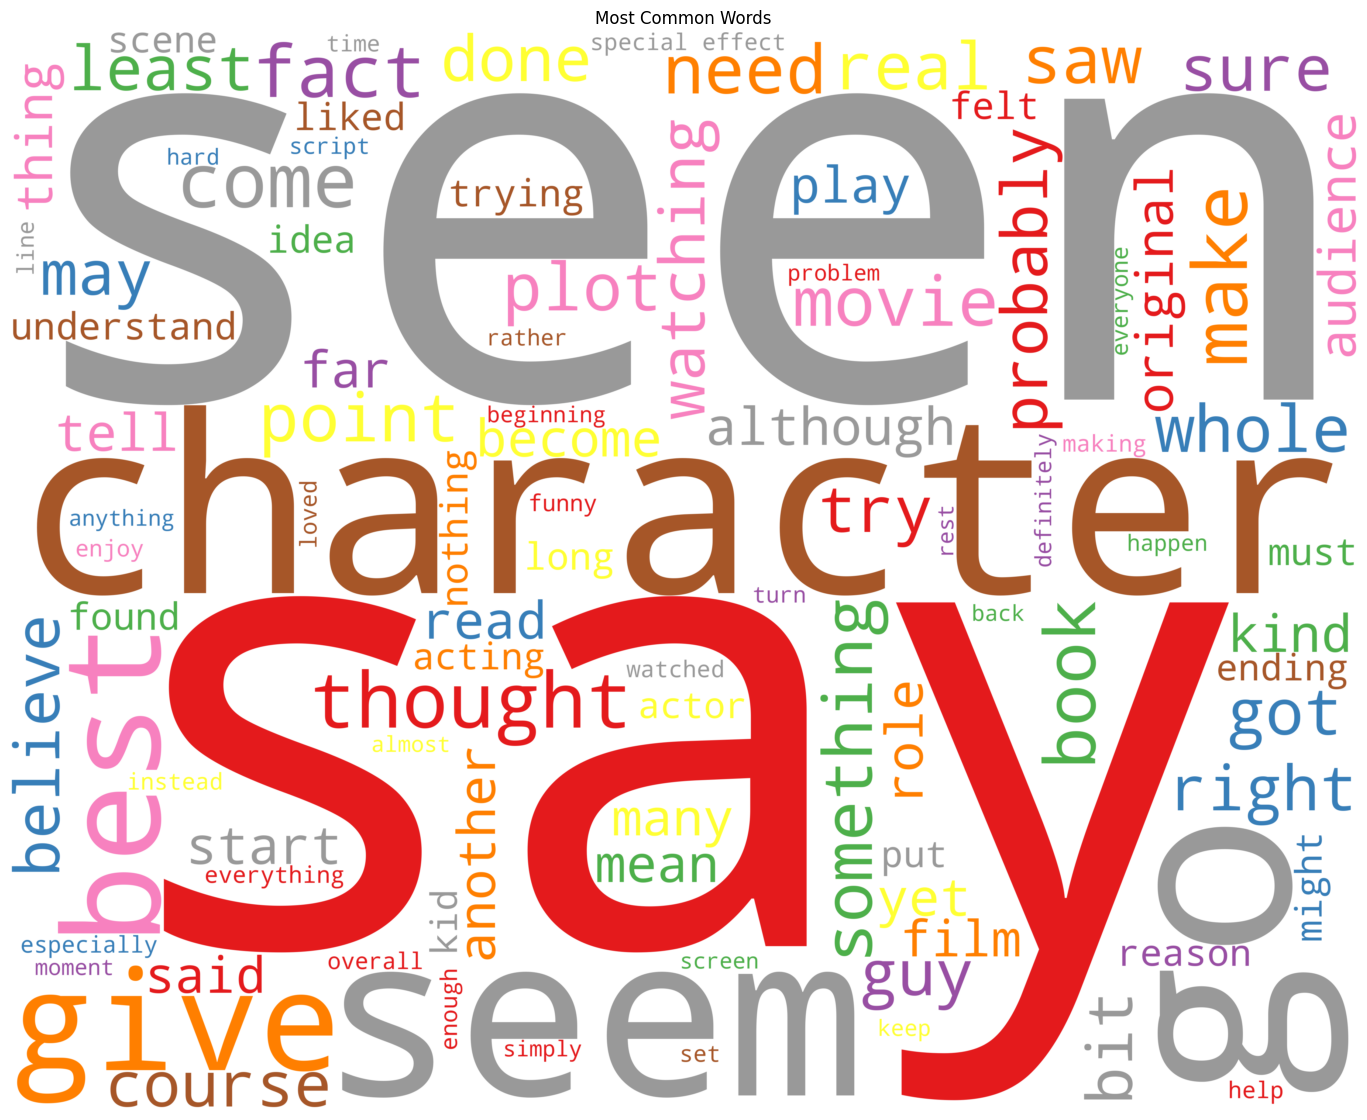

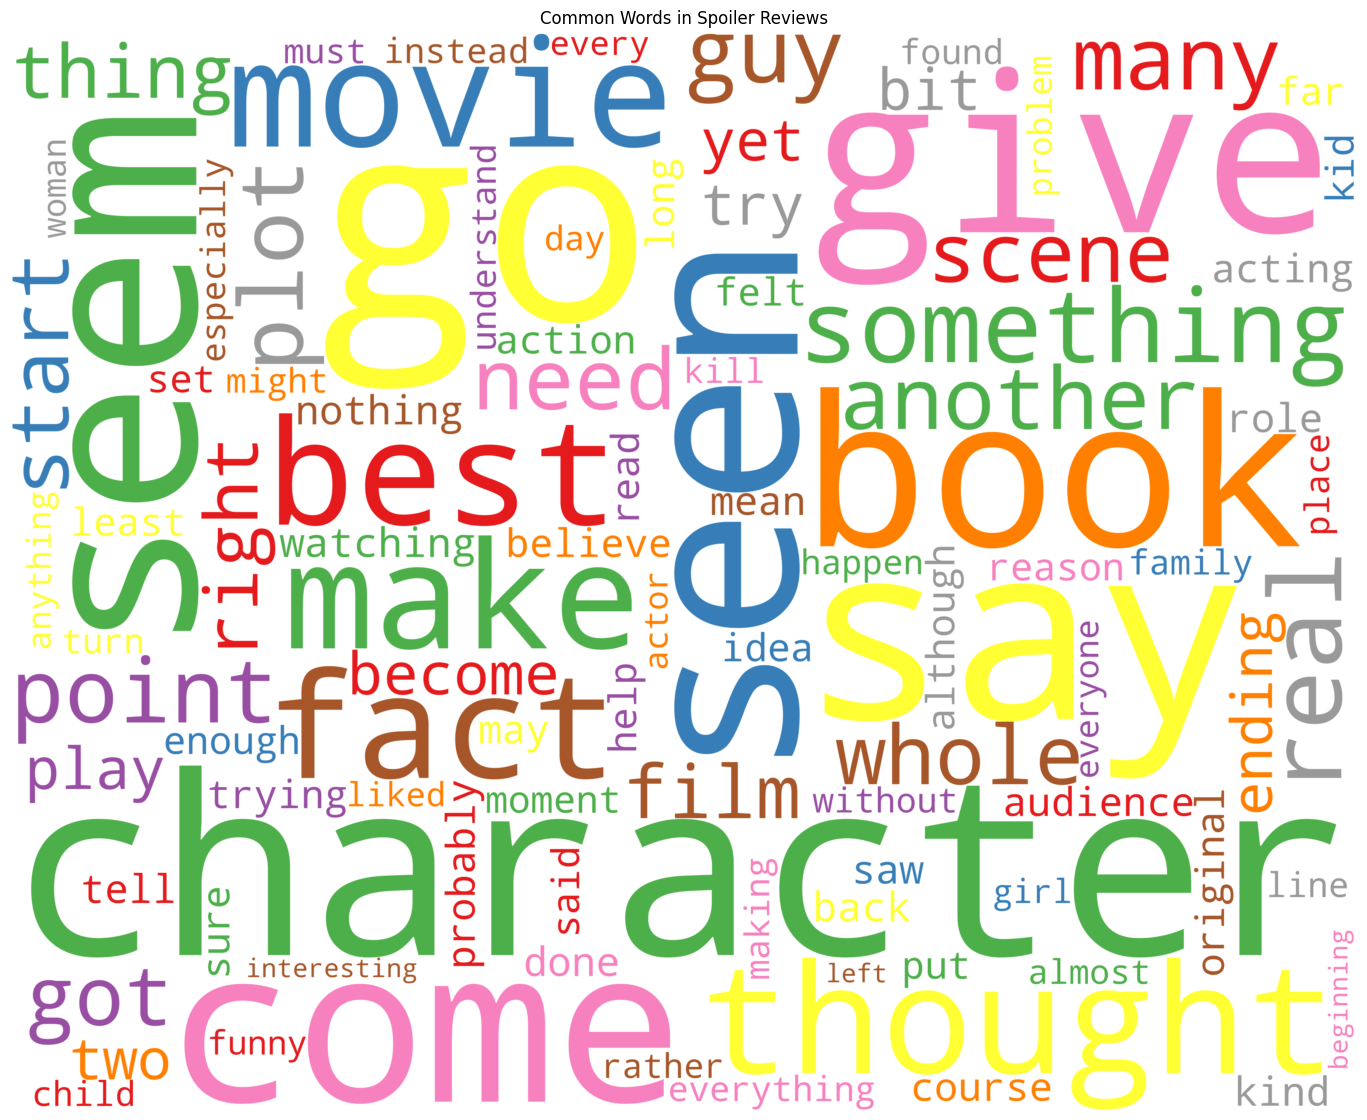

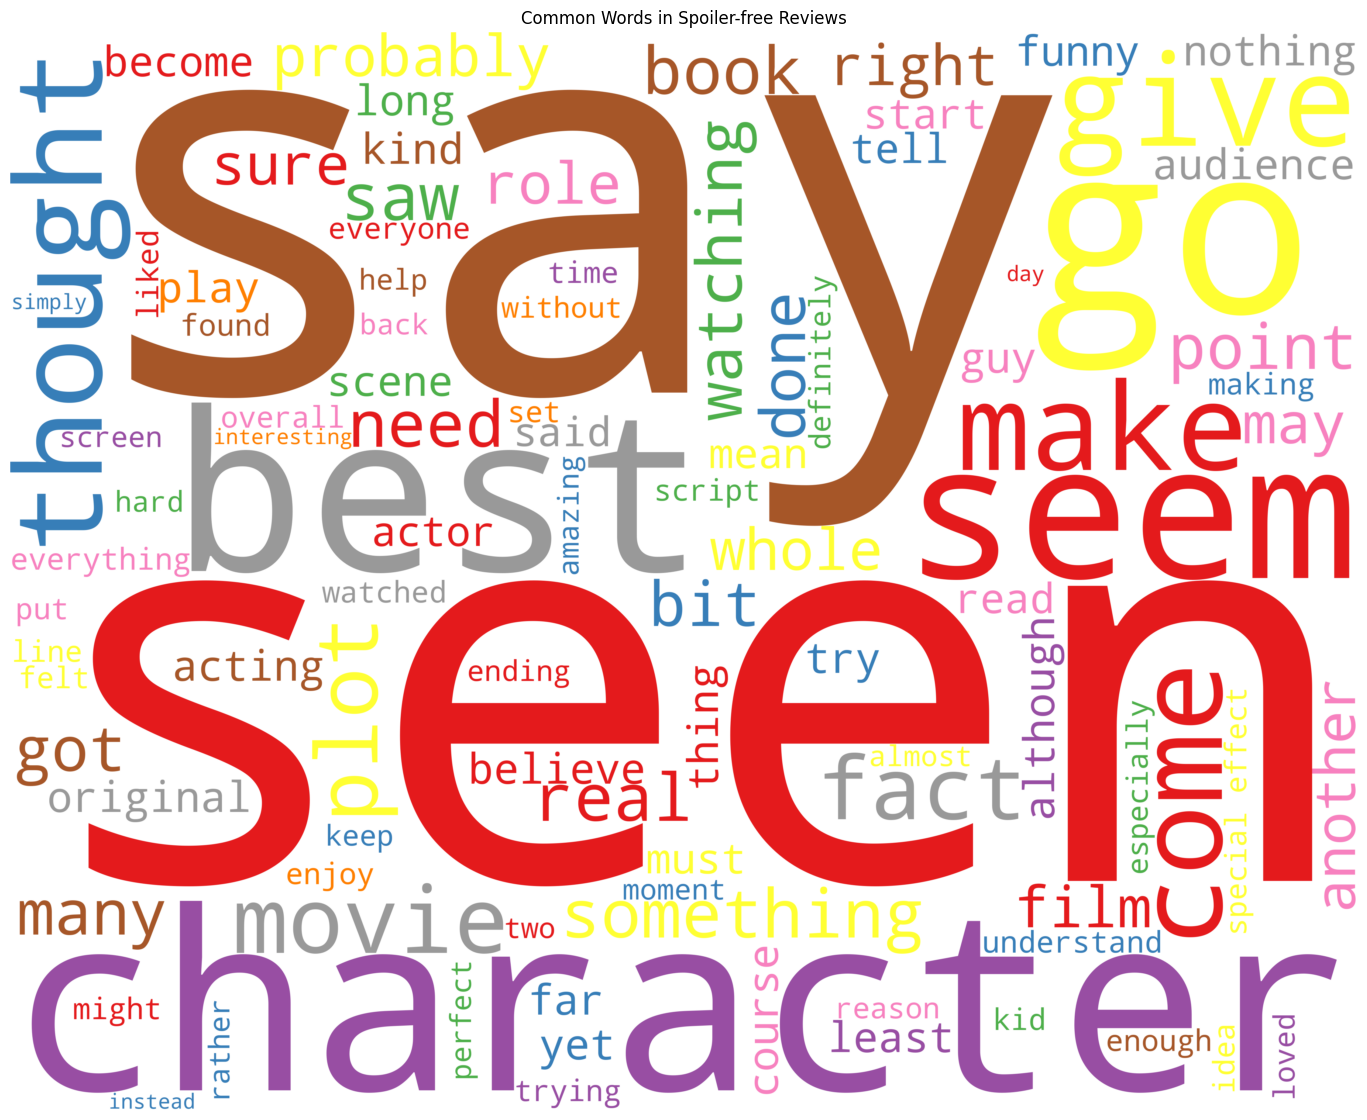

In [17]:
#Word cloud after cleaning
all_reviews_c = ' '.join(data_c['review_text'].astype(str))
create_wc(all_reviews_c, 'Most Common Words')
spoiler_data_c = data_c[data_c['is_spoiler'] == True]
non_spoiler_data_c = data_c[data_c['is_spoiler'] == False]
spoiler_reviews_c = ' '.join(spoiler_data_c['review_text'].astype(str))
non_spoiler_reviews_c = ' '.join(non_spoiler_data_c['review_text'].astype(str))
create_wc(spoiler_reviews_c, 'Common Words in Spoiler Reviews')
create_wc(non_spoiler_reviews_c, 'Common Words in Spoiler-free Reviews')

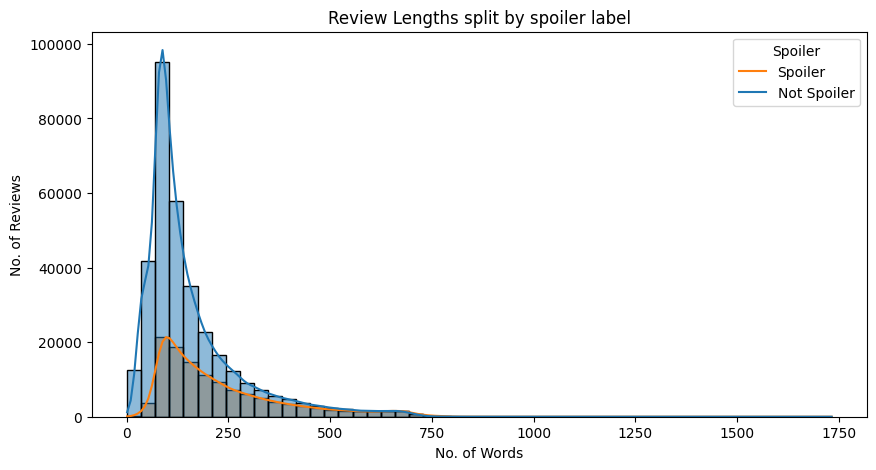

In [33]:
#Histogram of spoiler and non-spoiler by word count (post-cleaning)
data_c['word_count'] = data_c['review_text'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.histplot(data=data_c, x='word_count',bins=50, kde=True, hue='is_spoiler')
plt.title('Review Lengths split by spoiler label')
plt.xlabel('No. of Words')
plt.ylabel('No. of Reviews')
plt.legend(title = 'Spoiler', labels= ['Spoiler','Not Spoiler'])
plt.show()

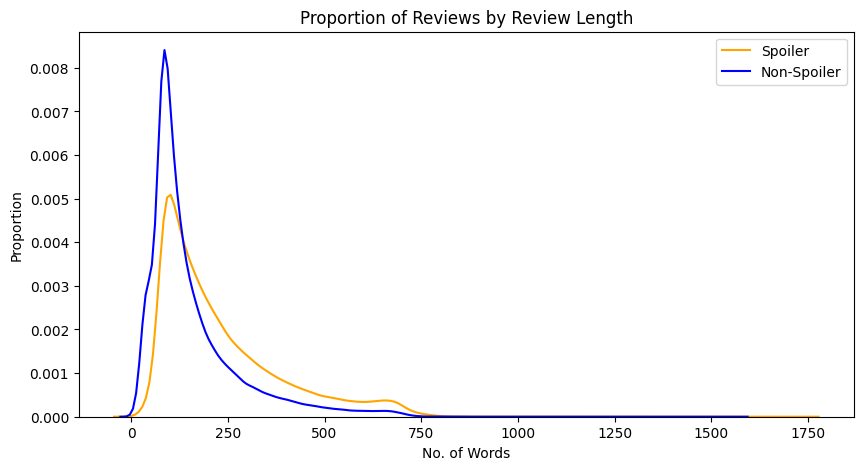

In [34]:
#Density plot of spoiler and non-spoiler by word count (Post-cleaning)
spoiler_data_c = data_c[data_c['is_spoiler']==True]
non_spoiler_data_c = data_c[data_c['is_spoiler']==False]
spoiler_word_count_c= spoiler_data_c['word_count']
non_spoiler_word_count_c= non_spoiler_data_c['word_count']
plt.figure(figsize=(10,5))
sns.kdeplot(spoiler_word_count_c, label='Spoiler', color='orange')
sns.kdeplot(non_spoiler_word_count_c, label='Non-Spoiler', color='blue')
plt.xlabel('No. of Words')
plt.ylabel('Proportion')
plt.title('Proportion of Reviews by Review Length')
plt.legend()
plt.show()

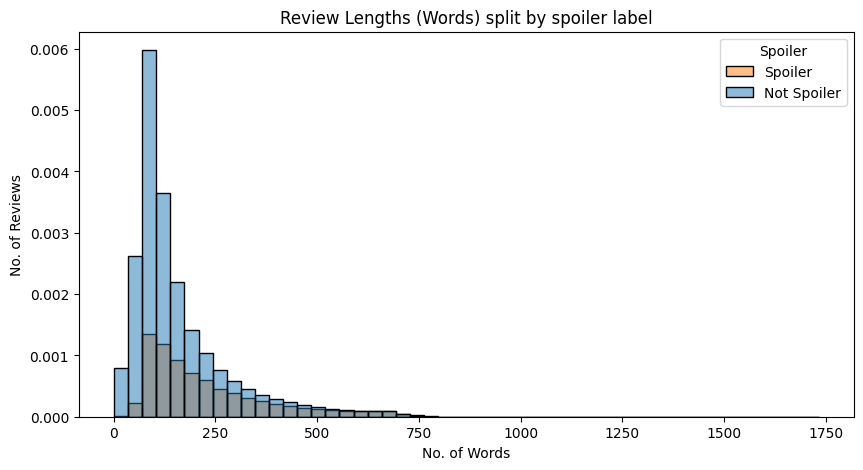

In [35]:
#Histogram of proportions of spoiler labels by word count (Post-cleaning)
plt.figure(figsize=(10,5))
sns.histplot(data=data_c, x='word_count',bins=50, hue='is_spoiler', stat='density')
plt.title('Review Lengths (Words) split by spoiler label')
plt.xlabel('No. of Words')
plt.ylabel('No. of Reviews')
plt.legend(title = 'Spoiler', labels= ['Spoiler','Not Spoiler'])
plt.show()

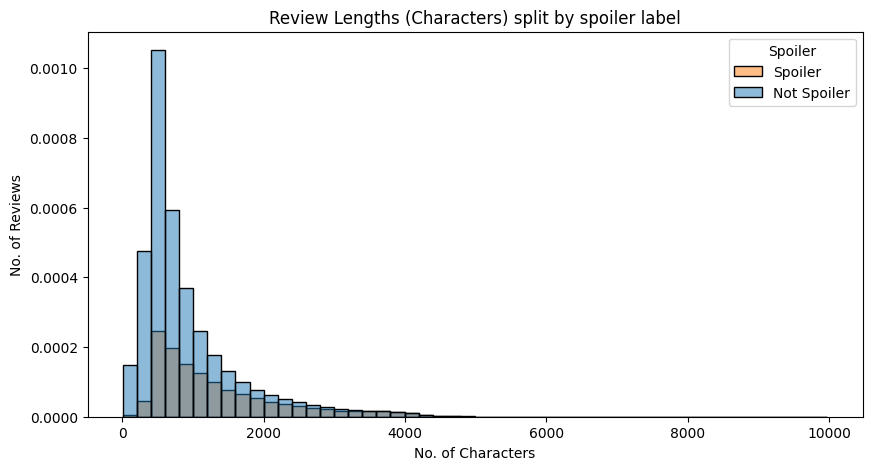

In [36]:
#Histogram of proportions of spoiler and non-spoiler by character count (post-cleaning)
data_c['char_count'] = data_c['review_text'].astype(str).apply(lambda x: len(x))
plt.figure(figsize=(10,5))
sns.histplot(data=data_c, x='char_count',bins=50, hue='is_spoiler', stat='density')
plt.title('Review Lengths (Characters) split by spoiler label')
plt.xlabel('No. of Characters')
plt.ylabel('No. of Reviews')
plt.legend(title = 'Spoiler', labels= ['Spoiler','Not Spoiler'])
plt.show()